## k-meamsアルゴリズム
クラスタリングに用いられるアルゴリズムのうち初期のもの

## アルゴリズムの計算の方法について
1. ランダムに初期クラスタの中心を選択  
2. クラスタの中心を計算
3. 収束するまで繰り返す

## 1. ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

## 2. k-means法の関数の定義

In [2]:
def kmeans(x, cluster, max_iters=100):
    np.random.seed(0)
    n_samples, n_features = x.shape
    # ランダムに初期クラスタ中心を選択
    centroids = x[np.random.choice(n_samples, cluster, replace=False)]
    for _ in range(max_iters):
        # 各サンプルに最も近いクラスタ中心を割り当て
        distances = np.linalg.norm(x[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        # クラスタ中心を更新
        new_centroids = np.array([x[labels == k].mean(axis=0) for k in range(cluster)])
        # 収束判定
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

初期クラスタを適当に選択  
同じクラスタの数値の平均値をクラスタの中心とする  
計算前の中心と計算後の中心の値が一致するか判定

## 3.サンプルデータの生成

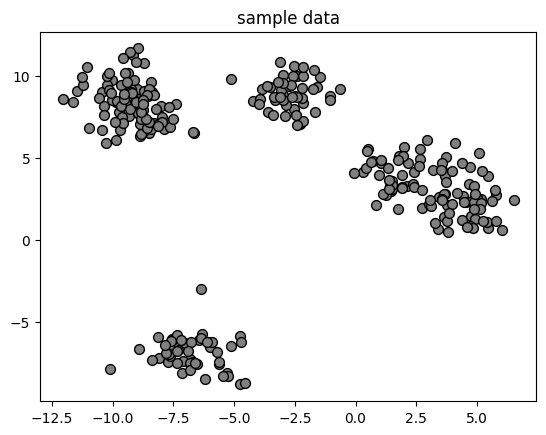

In [3]:
# データセットの生成
n_samples = 300
n_features = 2
n_clusters = 6
x, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

# データの可視化
plt.scatter(x[:, 0], x[:, 1], c='gray', marker='o', edgecolor='k', s=50)
plt.title('sample data')
plt.xlabel('')
plt.ylabel('')
plt.show() 

## 3.k-meansのモデルの定義

In [4]:
# モデルの構築
labels, centroids = kmeans(x, n_clusters)

## 4.反復して実行

収束するまで繰り返して実行する

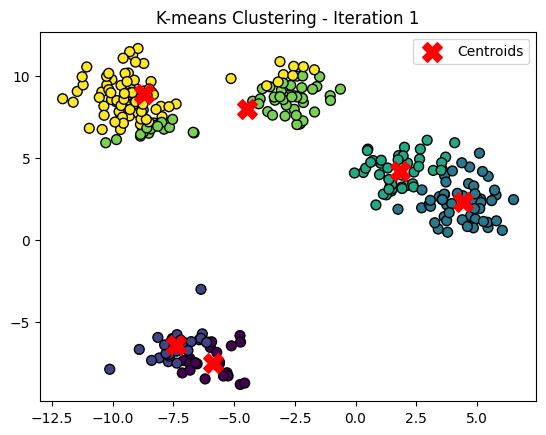

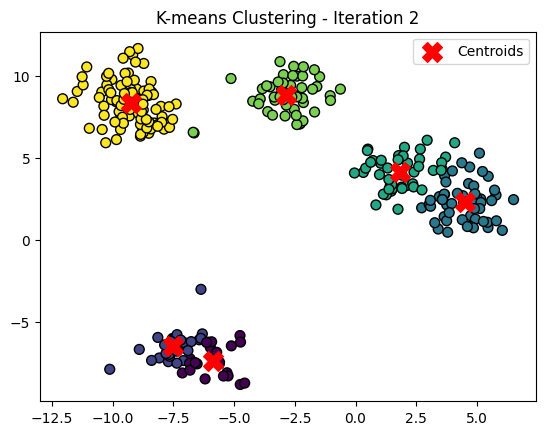

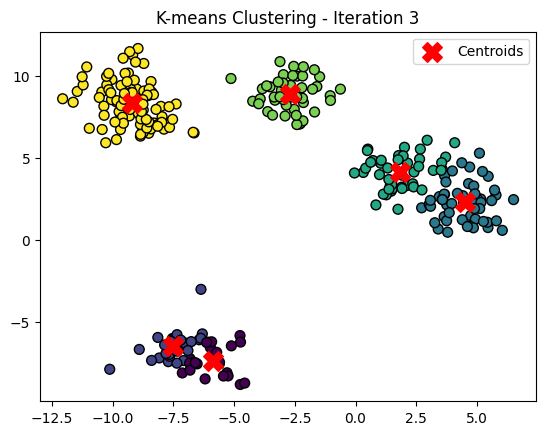

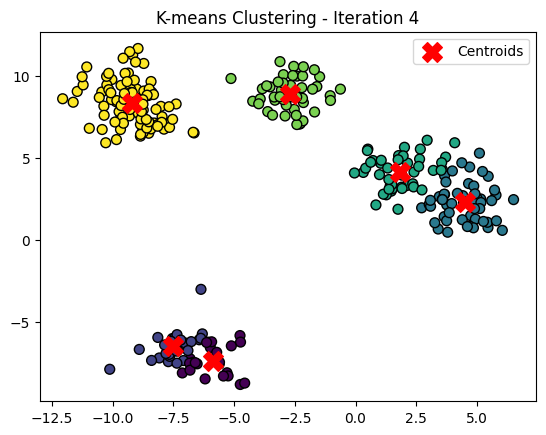

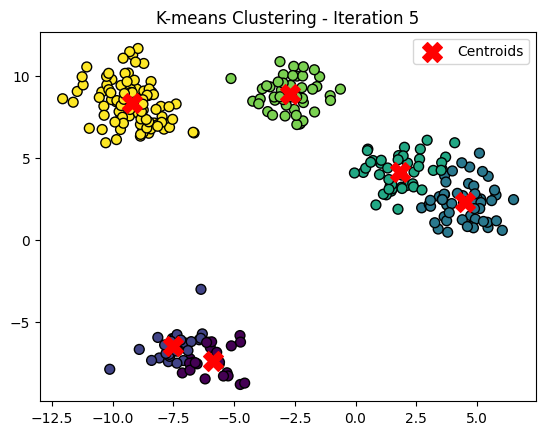

In [5]:
# 反復して実行
for iteration in range(1, 6):
    labels, centroids = kmeans(x, n_clusters, max_iters=iteration)
    plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-means Clustering - Iteration {iteration}')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    plt.show()

6つのクラスタにクラスタリングすることができた

## 5.クラスタの数で比較

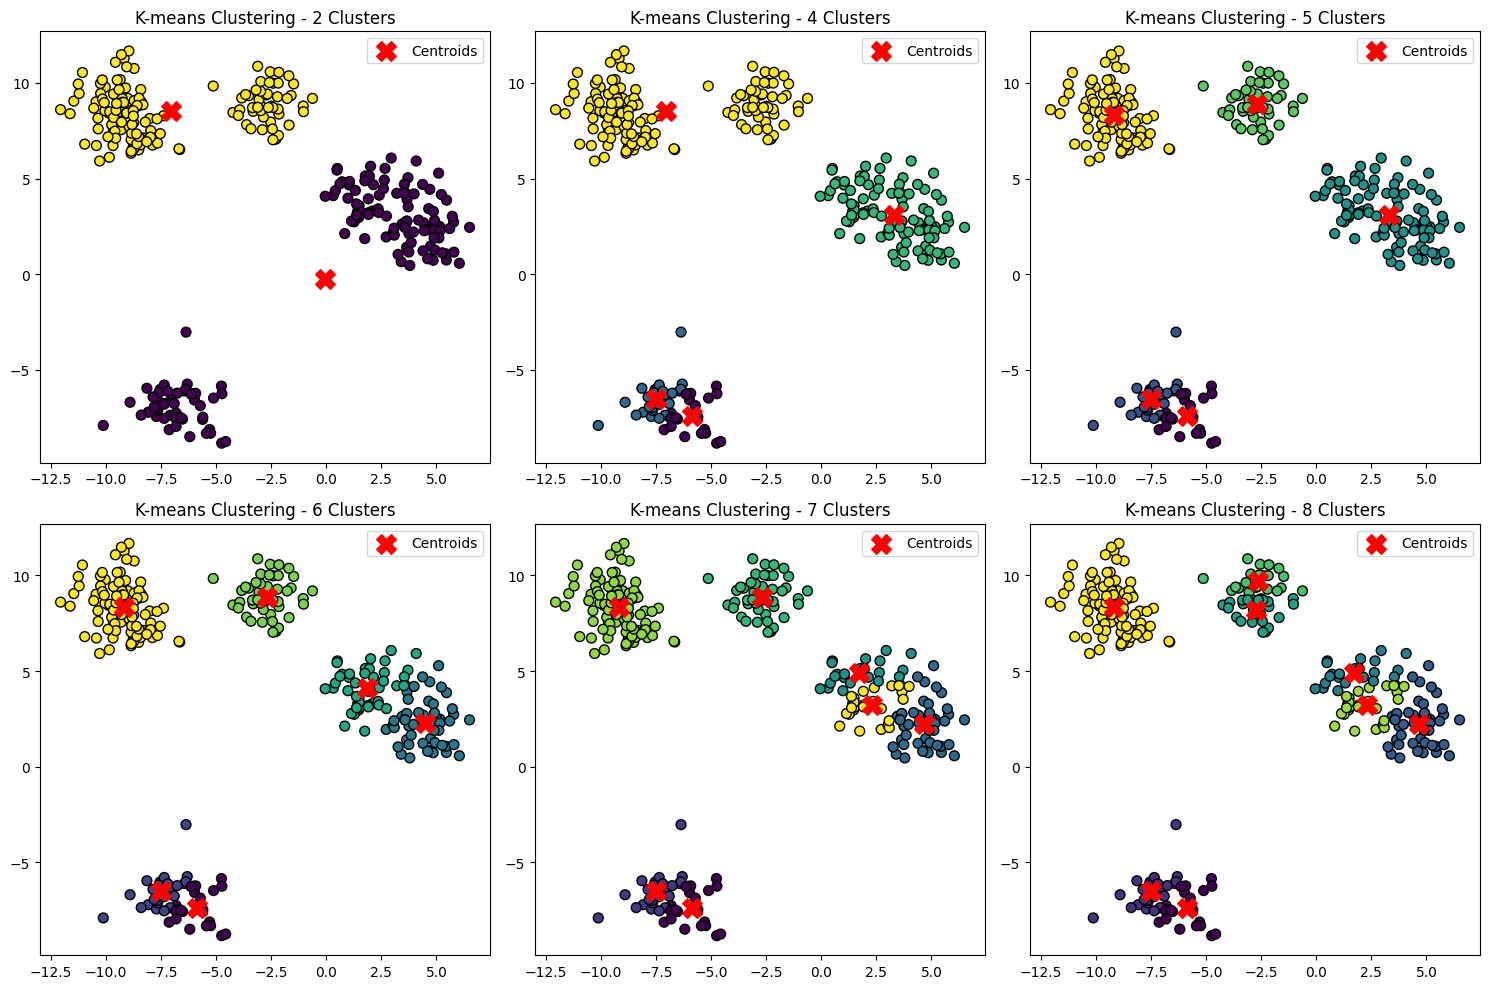

In [6]:
# クラスタ数が異なる場合の比較
n_clusters_list = [2, 4, 5, 6, 7, 8]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for ax, n_clusters in zip(axes.flatten(), n_clusters_list): 
    labels, centroids = kmeans(x, n_clusters)
    ax.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    ax.set_title(f'K-means Clustering - {n_clusters} Clusters')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend()
plt.tight_layout()
plt.show()

今回の場合はクラスタは4～6個が適切であると主観的に考えられる．  
しかし，実際のデータは適切なクラスタの数がわからないため，それを考慮したアルゴリズムを用いるべきである．  
そこでEM法が考えられた．